# Data Analysis using Statistical methods

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

### 1.1 Meet the data
#### Objectives:
- Know the dimension of the dataframe
- Know the type of each variable (Continuous or Categorical)
- Check for the no. of missing values
- Decide on the target variable



In [2]:
heart_data = pd.read_csv('data/2020/heart_2020_cleaned.csv')
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print(f'Dimensions of the data: {heart_data.shape}')
heart_data.dtypes

Dimensions of the data: (319795, 18)


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Description of each column

| <b>Column</b> | <b>Data type</b> |
|----------|----------|
| HeartDisease   | Nominal   |
| BMI    | Continuous    |
| Smoking      | Nominal      |
| AlcoholDrinking      | Nominal      |
| Stroke        | Nominal      |
| PhysicalHealth       | Ordinal      |
| MentalHealth      | Ordinal      |
| DiffWalking      | Nominal      |
| Sex         | Nominal      |
| AgeCategory      | Nominal      |
| Race      | Nominal      |
| Diabetic      | Nominal      |
| PhysicalActivity      | Nominal      |
| GenHealth      | Ordinal      |
| SleepTime      | Continuous      |
| Asthma        | Nominal      |
| KidneyDisease       | Nominal      |
| SkinCancer   | Nominal   |

In the above data, there are 18 different columns and over 300k datapoints


In [4]:
missing_values = heart_data.isnull().sum()
print(missing_values)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64



- Fortunately, there are no missing values in this data. Hence, we shall go to the next step of data visualization.
- Going forward, we shall consider `HeartDisease` as the target variable

### 1.2 Summary Statistics and Data Visualization
#### Objectives:
- Calculate the five number summary for the continuous variables
- Plot different visualizations to better understand the data

In [5]:
# Creating a list of the continuous variables and categorical variables
continuous_variables = ['BMI', 'SleepTime']
nominal_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
ordinal_variables = ['PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth']

In [6]:
heart_data[continuous_variables].describe()

,BMI,SleepTime
count,319795.000000,319795.000000
mean,28.325399,7.097075
std,6.356100,1.436007
min,12.020000,1.000000
25%,24.030000,6.000000
50%,27.340000,7.000000
75%,31.420000,8.000000
max,94.850000,24.000000


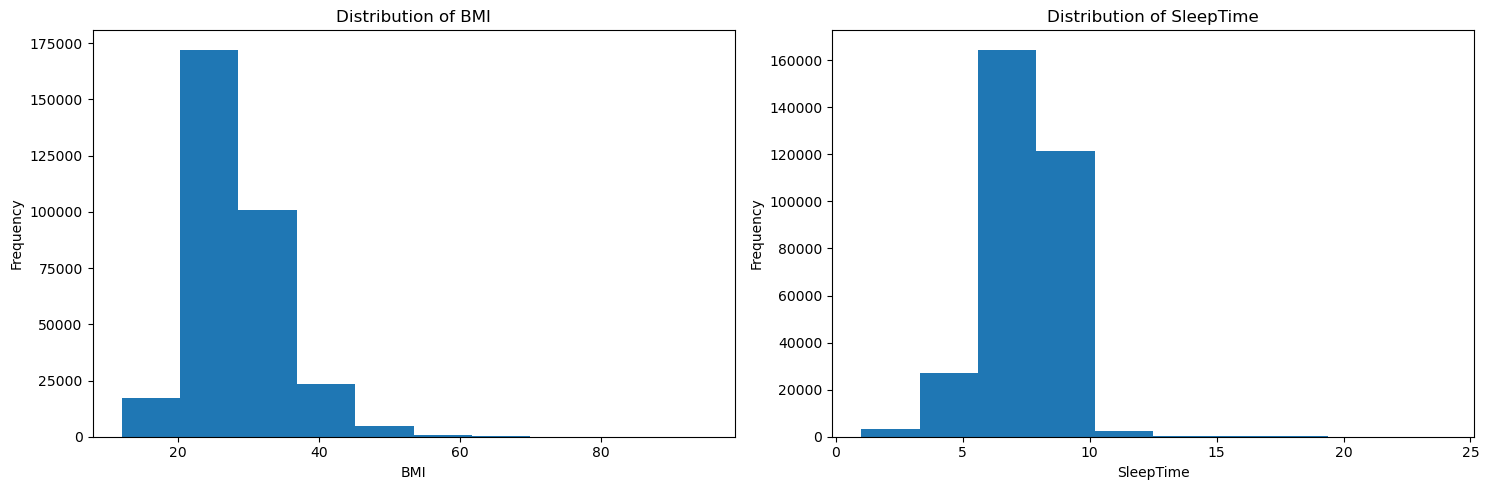

<Figure size 640x480 with 0 Axes>

In [7]:
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Creating a figure and subplots
fig, axes = plt.subplots(1, len(continuous_variables), figsize=(15, 5))

# Looping through each continuous variable and plotting the corresponding visualization
for i, var in enumerate(continuous_variables):
    axes[i].hist(heart_data[var], bins=10)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Adjusting the spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()
plt.savefig('visualizations/continuous_variables.png')


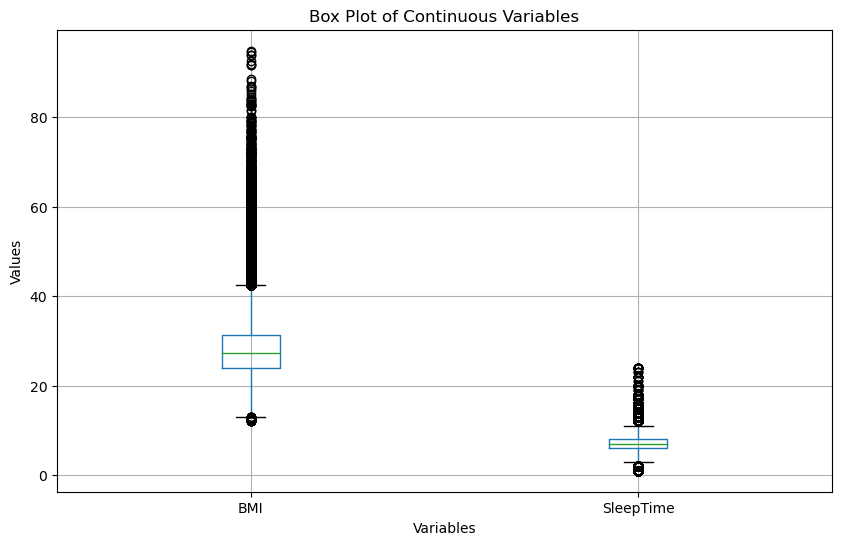

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 6))
heart_data[continuous_variables].boxplot()
plt.title('Box Plot of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()
plt.savefig('visualizations/continuous_variables_boxplot.png')

In [9]:
# Calculating the IQR for each continuous variable
Q1 = heart_data[continuous_variables].quantile(0.25)
Q3 = heart_data[continuous_variables].quantile(0.75)
IQR = Q3 - Q1

# Calculating the number of outliers for each continuous variable
outliers = ((heart_data[continuous_variables] < (Q1 - 1.5 * IQR)) | (heart_data[continuous_variables] > (Q3 + 1.5 * IQR))).sum()

print('Number of outliers for each continuous variable:')
print(outliers)

Number of outliers for each continuous variable:
BMI          10396
SleepTime     4543
dtype: int64


In [10]:
# Removing the rows with outliers in BMI and SleepTime

Q1_bmi = heart_data['BMI'].quantile(0.25)
Q3_bmi = heart_data['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

Q1_sleeptime = heart_data['SleepTime'].quantile(0.25)
Q3_sleeptime = heart_data['SleepTime'].quantile(0.75)
IQR_sleeptime = Q3_sleeptime - Q1_sleeptime

heart_data = heart_data[(heart_data['BMI'] >= (Q1_bmi - 1.5 * IQR_bmi)) & (heart_data['BMI'] <= (Q3_bmi + 1.5 * IQR_bmi))]
heart_data = heart_data[(heart_data['SleepTime'] >= (Q1_sleeptime - 1.5 * IQR_sleeptime)) & (heart_data['SleepTime'] <= (Q3_sleeptime + 1.5 * IQR_sleeptime))]

heart_data.shape


(305113, 18)

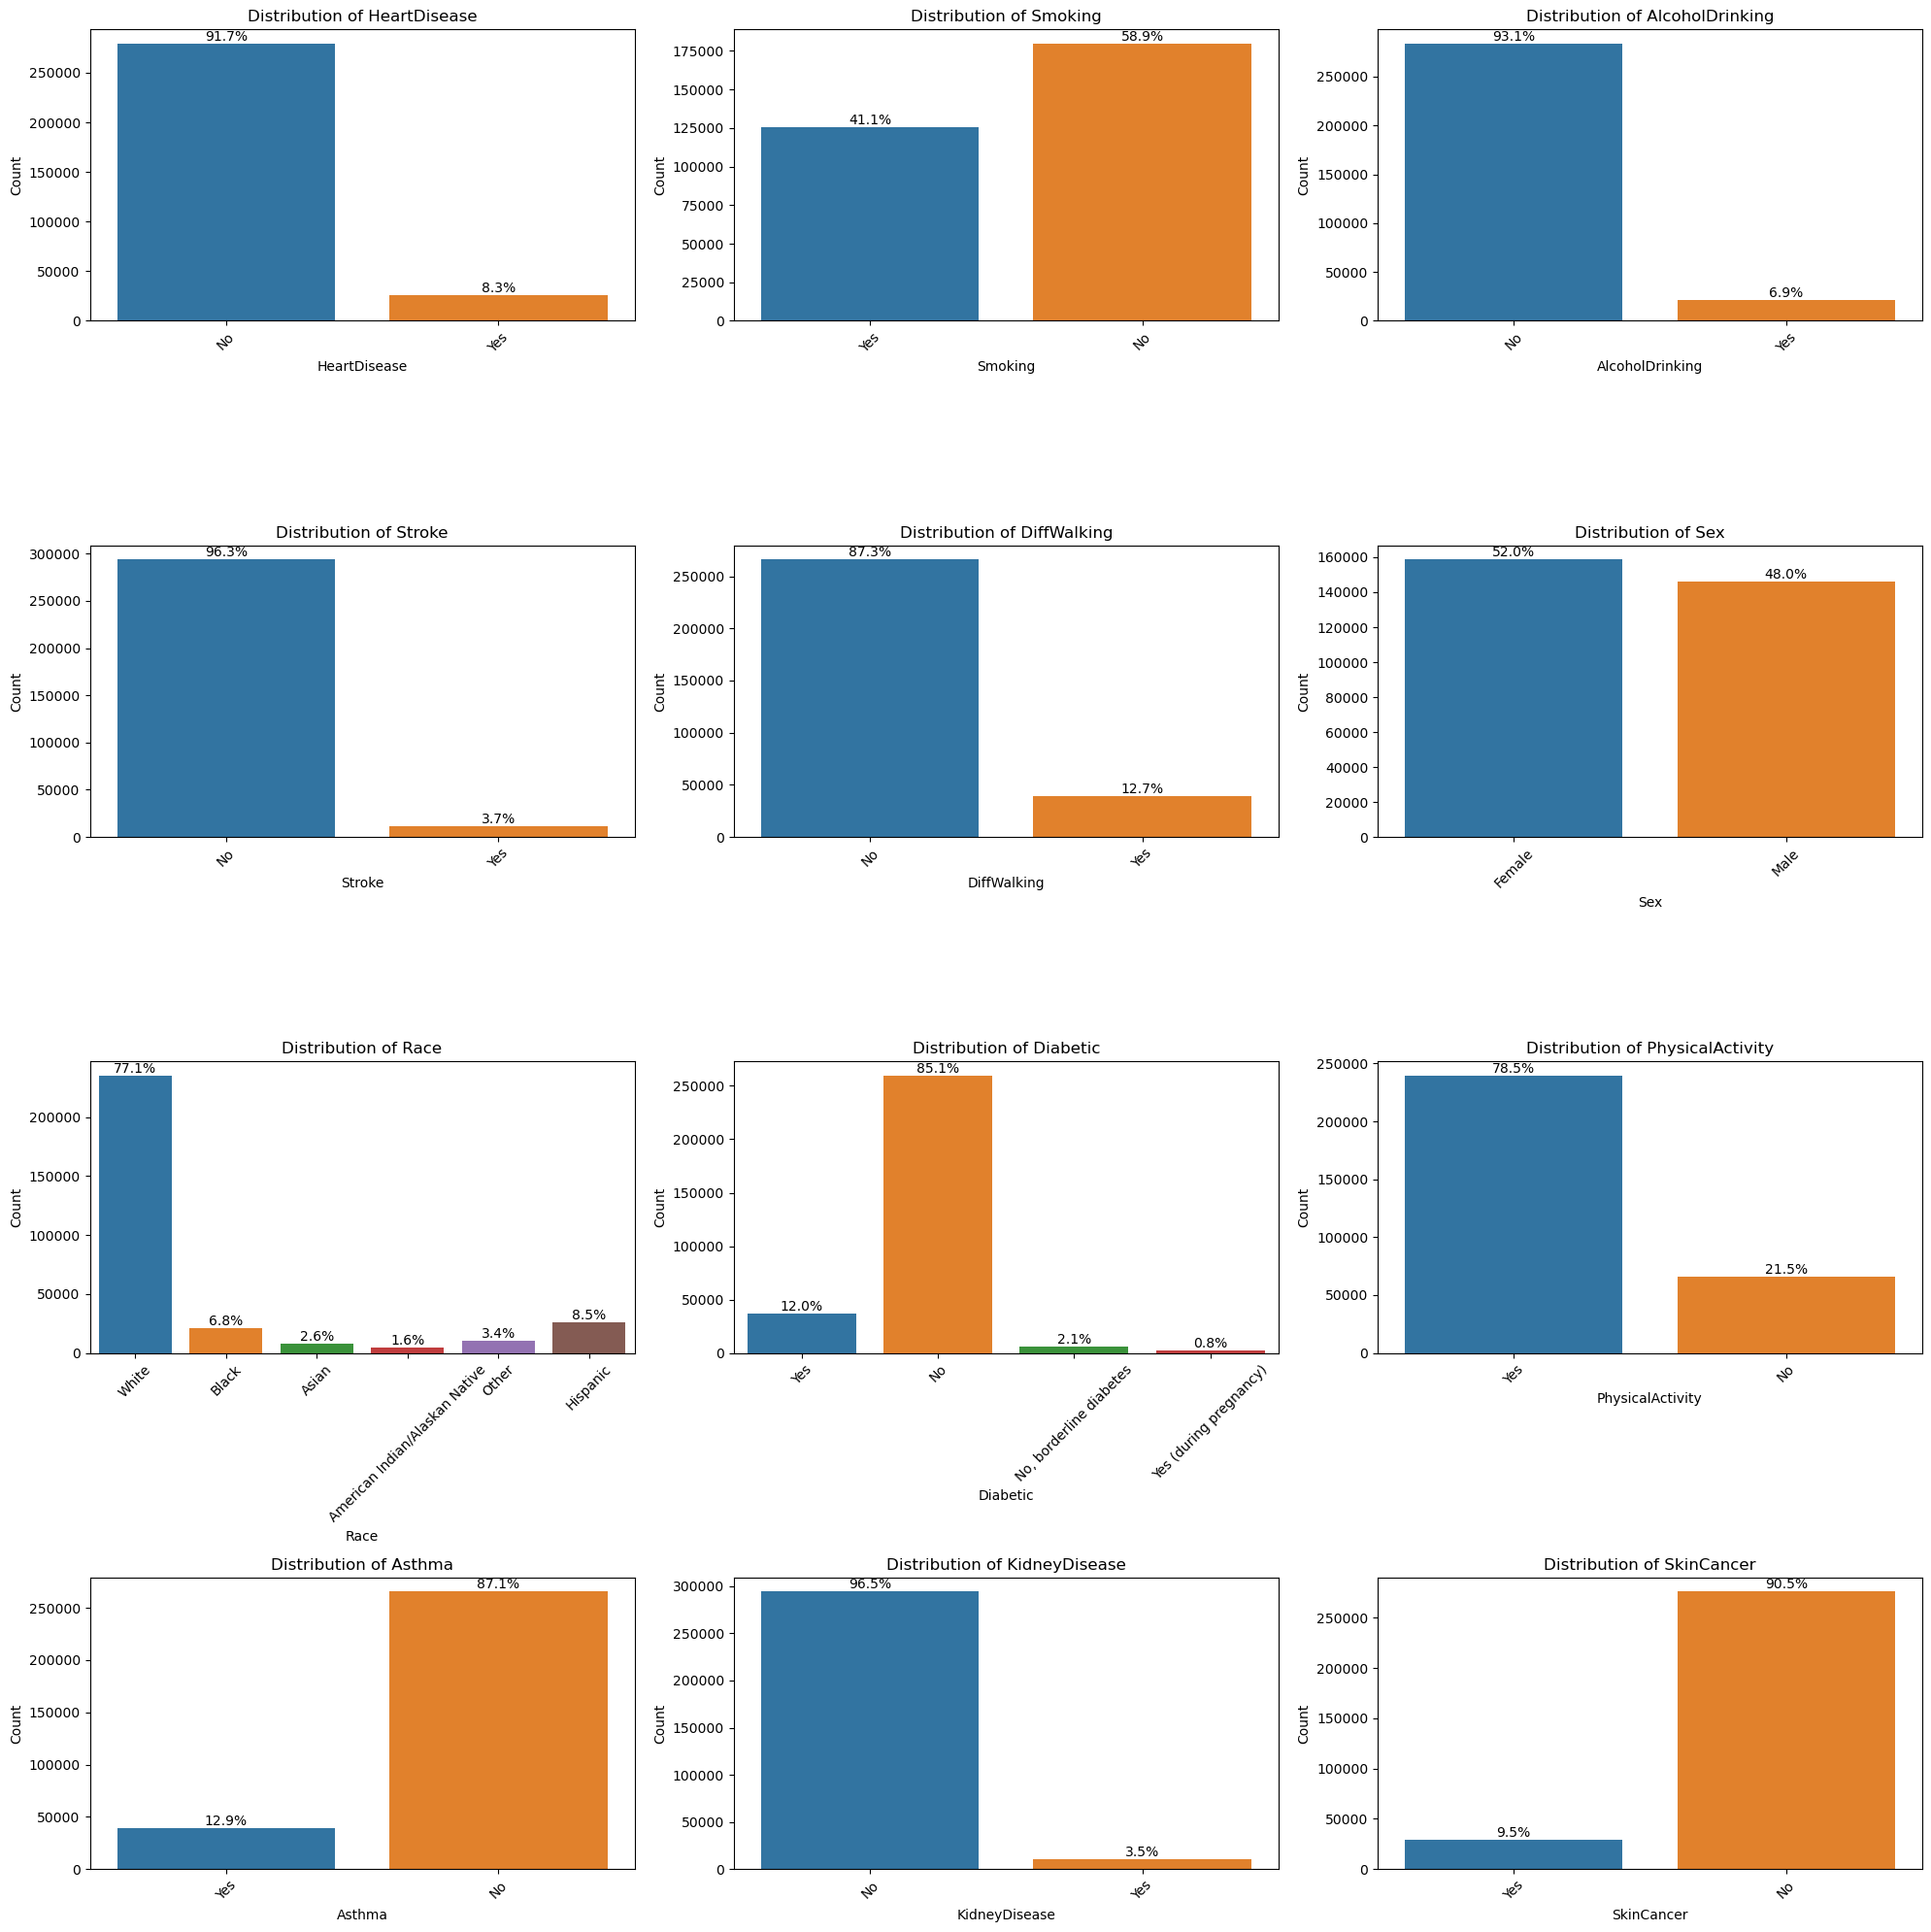

<Figure size 640x480 with 0 Axes>

In [11]:
# Defining the number of rows and columns for the subplots
num_rows = 4
num_cols = 3

# Creating a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

axes = axes.flatten()

for i, nom_var in enumerate(nominal_variables):
    sns.countplot(x=nom_var, data=heart_data, ax=axes[i])
    axes[i].set_title(f"Distribution of {nom_var}")
    axes[i].set_xlabel(nom_var)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45) 
    
    total = len(heart_data)
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()
plt.savefig('visualizations/nominal_variables.png')


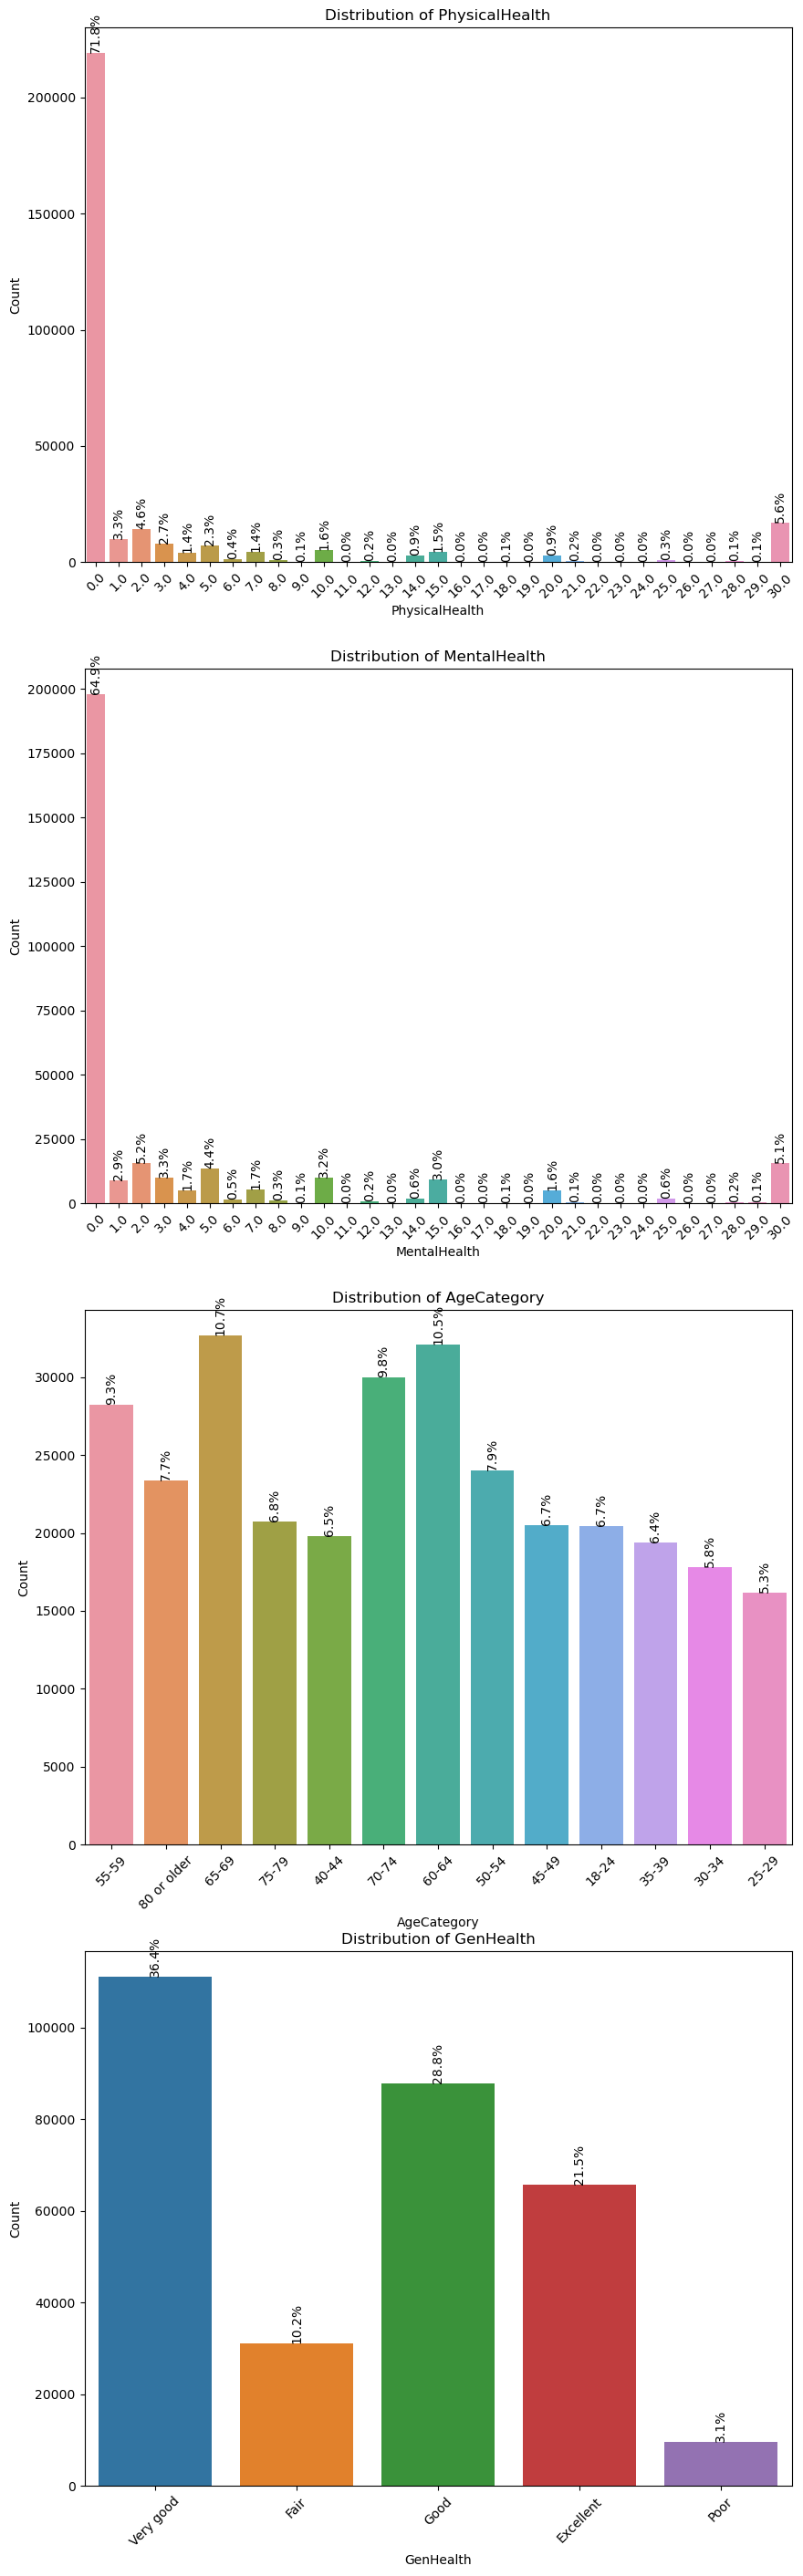

In [12]:
# Creating a figure and subplots
fig, axes = plt.subplots(len(ordinal_variables), 1, figsize=(10, 35))
# Looping through each ordinal variable
for i, var in enumerate(ordinal_variables):
    # Creating a count plot for the current ordinal variable
    sns.countplot(x=var, data=heart_data, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    
    total = len(heart_data)
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom', rotation=90)
    plt.savefig('visualizations/ordinal_variables.png')


#### Summary:
- There are 10k data points of BMI and 4.5k data points of SleepTime
- The variables, `HeartDisease`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `PhysicalActivity`, `Asthma`, `KidneyDisease`, `SkinCancer`, `Race`, `Diabetic`, `PhysicalHealth`, `MentalHealth` are highly imbalanced
- Since, we are dealing with data related to human beings and their health, variations in columns are natural. Hence, we shall not drop any outliers
- The visualization of the continuous variables do not give us the surity that it is a normal distribution. Hence, we shall perform tests to check their normality



### 1.3 Normality Tests
#### Objectives:
To test the normality of the variables `BMI`, `SleepTime`, we shall do the following:
- Use QQ plot to understand how close they are to a normal distribution
- Use Statistical Methods to check if they are normal

#### QQ Plot

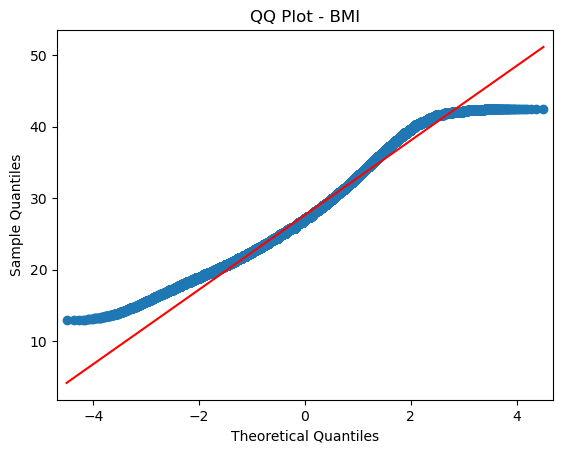

<Figure size 640x480 with 0 Axes>

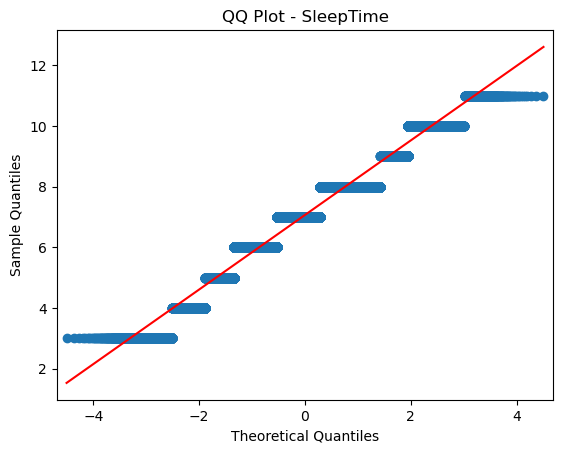

<Figure size 640x480 with 0 Axes>

In [13]:
# Creating QQ plot for BMI
sm.qqplot(heart_data['BMI'], line='s')
plt.title('QQ Plot - BMI')
plt.show()
plt.savefig('visualizations/qqplot_bmi.png')

# Creating QQ plot for SleepTime
sm.qqplot(heart_data['SleepTime'], line='s')
plt.title('QQ Plot - SleepTime')
plt.show()
plt.savefig('visualizations/qqplot_sleeptime.png')


#### Summary:
- Since the plot is nowhere closer to the straight line, we shall conclude that these variables are not normal.
- This observation shall be pivotal in inferential statistics, especially when applying different tests

### 1.4 Data Preprocessing and Correlation Analysis
#### Objectives: 
- Prepare the data for correlation analysis and for further analysis
- Plot the correlation matrix to better understand the relevance of one variable and the other


In [14]:
# Removing the data points where diabetes is either borderline or for pregnant women

heart_data = heart_data[heart_data.Diabetic != 'No, borderline diabetes']
heart_data = heart_data[heart_data.Diabetic != 'Yes (during pregnancy)']


heart_data = heart_data.drop(['PhysicalHealth', 'MentalHealth'], axis=1)



In [15]:
missing_values = heart_data.isnull().sum()
print(missing_values)


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [16]:
# Converting the categorical variables
binary_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Diabetic']
multi_categories = ['Race', 'AgeCategory', 'GenHealth']

label_encoding_dict = {'No': 0, 'Yes': 1, 
                       'Female': 1, 'Male': 0,
                       'White': 0, 'Hispanic': 1, 'Black': 2, 'Asian': 3, 'Other': 4, 'American Indian/Alaskan Native': 5,
                       'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4,
                       '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

for var in binary_variables:
    heart_data[var] = heart_data[var].map(label_encoding_dict)

for var in multi_categories:
    heart_data[var] = heart_data[var].map(label_encoding_dict)


In [17]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,1,1,4,0,0,1,3,8.0,0,0,0


In [18]:
print(f'Shape of the data: {heart_data.shape}')

Shape of the data: (296411, 16)


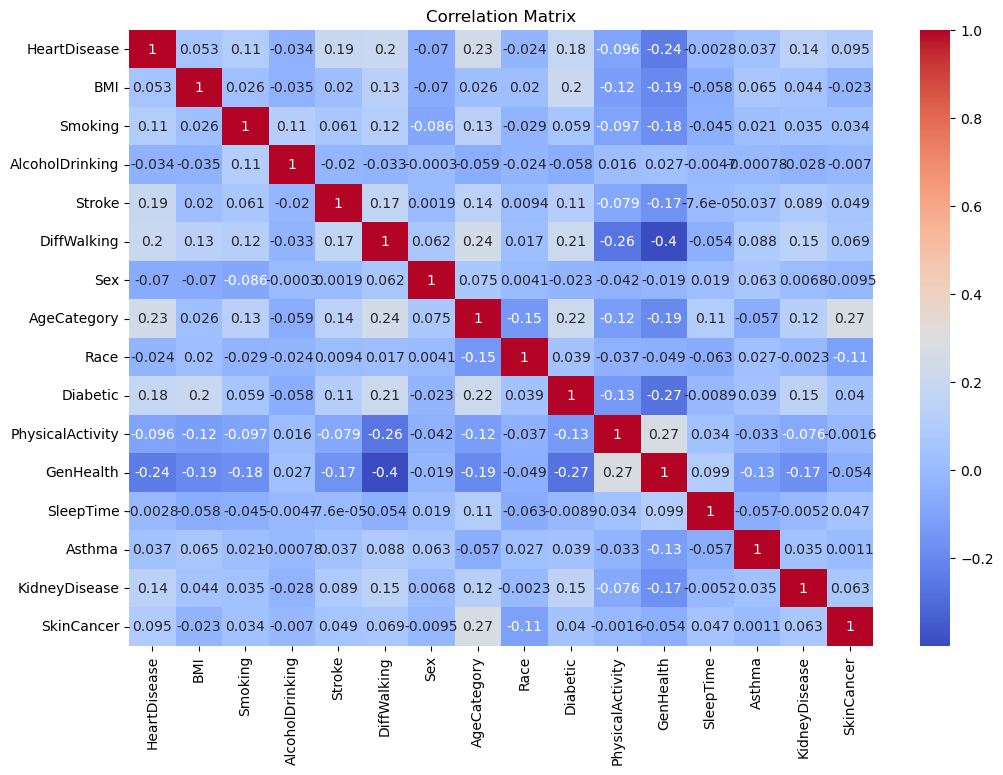

In [19]:
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Save the plot in the 'visualizations' directory
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('visualizations/correlation_matrix.png')
plt.show()


#### Summary:
- There is no strong correlation observed between the target variable and other variables
- There is a slight positive correlation between `DiffWalking` and `PhysicalHealth` (0.43)
- There is a slight negative correlation in the pairs (`GenHealth`, `PhysicalHealth`) and (`GenHealth`, `DiffWalking`)

## 2. Inferential Statistics
### 2.1 Independence between each nominal variable and the target variable
#### Objectives:
- Use Chi-square test of independence to check whether the two categorical variables are independent of each other
- Use the test of independence for each nominal variable vs target variable (`HeartDisease`)

##### $H_{0}$: The nominal variable and `HeartDisease` are independent of each other
##### $H_{1}$: The nominal variable and `HeartDisease` are not independent of each other

In [20]:
sample_df = heart_data.sample(n=1000, random_state=42)

In [21]:
# Drop 'HeartDisease' from 'binary_variables'
binary_variables.remove('HeartDisease')

# Create an empty list to store the results
chi_test_results = []

# Loop through each variable in binary_variables
for var in binary_variables:
    # Create a contingency table between the variable and HeartDisease
    contingency_table = pd.crosstab(sample_df[var], sample_df['HeartDisease'])
    
    # Perform the Chi-Square Test of Independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in a dictionary
    result = {
        'Variable': var,
        'Chi-Square': chi2,
        'p-value': p_value
    }
    
    # Append the result to the results list
    chi_test_results.append(result)

# Convert the results list to a pandas DataFrame
results_df = pd.DataFrame(chi_test_results)

# Display the results
results_df


,Variable,Chi-Square,p-value
0,Smoking,12.938888,3.218261e-04
1,AlcoholDrinking,1.318482,2.508647e-01
2,Stroke,51.280386,8.007168e-13
3,DiffWalking,19.075629,1.256391e-05
4,Sex,14.883185,1.143780e-04
5,PhysicalActivity,6.146042,1.317065e-02
6,Asthma,3.103778,7.811081e-02
7,KidneyDisease,34.986378,3.320200e-09
8,SkinCancer,3.378215,6.606359e-02
9,Diabetic,16.413237,5.092833e-05


In [22]:
# Loop through each row in the results dataframe
for index, row in results_df.iterrows():
    # Get the variable name and p-value
    variable = row['Variable']
    p_value = row['p-value']
    
    if p_value < 0.05:
        print(f"There is evidence to reject the null hypothesis for {variable}.")
        print(f"The variable {variable} is dependent on HeartDisease\n")
    else:
        print(f"There is not enough evidence to reject the null hypothesis for {variable}.")
        print(f"The variable {variable} is independent of HeartDisease\n")

There is evidence to reject the null hypothesis for Smoking.
The variable Smoking is dependent on HeartDisease

There is not enough evidence to reject the null hypothesis for AlcoholDrinking.
The variable AlcoholDrinking is independent of HeartDisease

There is evidence to reject the null hypothesis for Stroke.
The variable Stroke is dependent on HeartDisease

There is evidence to reject the null hypothesis for DiffWalking.
The variable DiffWalking is dependent on HeartDisease

There is evidence to reject the null hypothesis for Sex.
The variable Sex is dependent on HeartDisease

There is evidence to reject the null hypothesis for PhysicalActivity.
The variable PhysicalActivity is dependent on HeartDisease

There is not enough evidence to reject the null hypothesis for Asthma.
The variable Asthma is independent of HeartDisease

There is evidence to reject the null hypothesis for KidneyDisease.
The variable KidneyDisease is dependent on HeartDisease

There is not enough evidence to reje

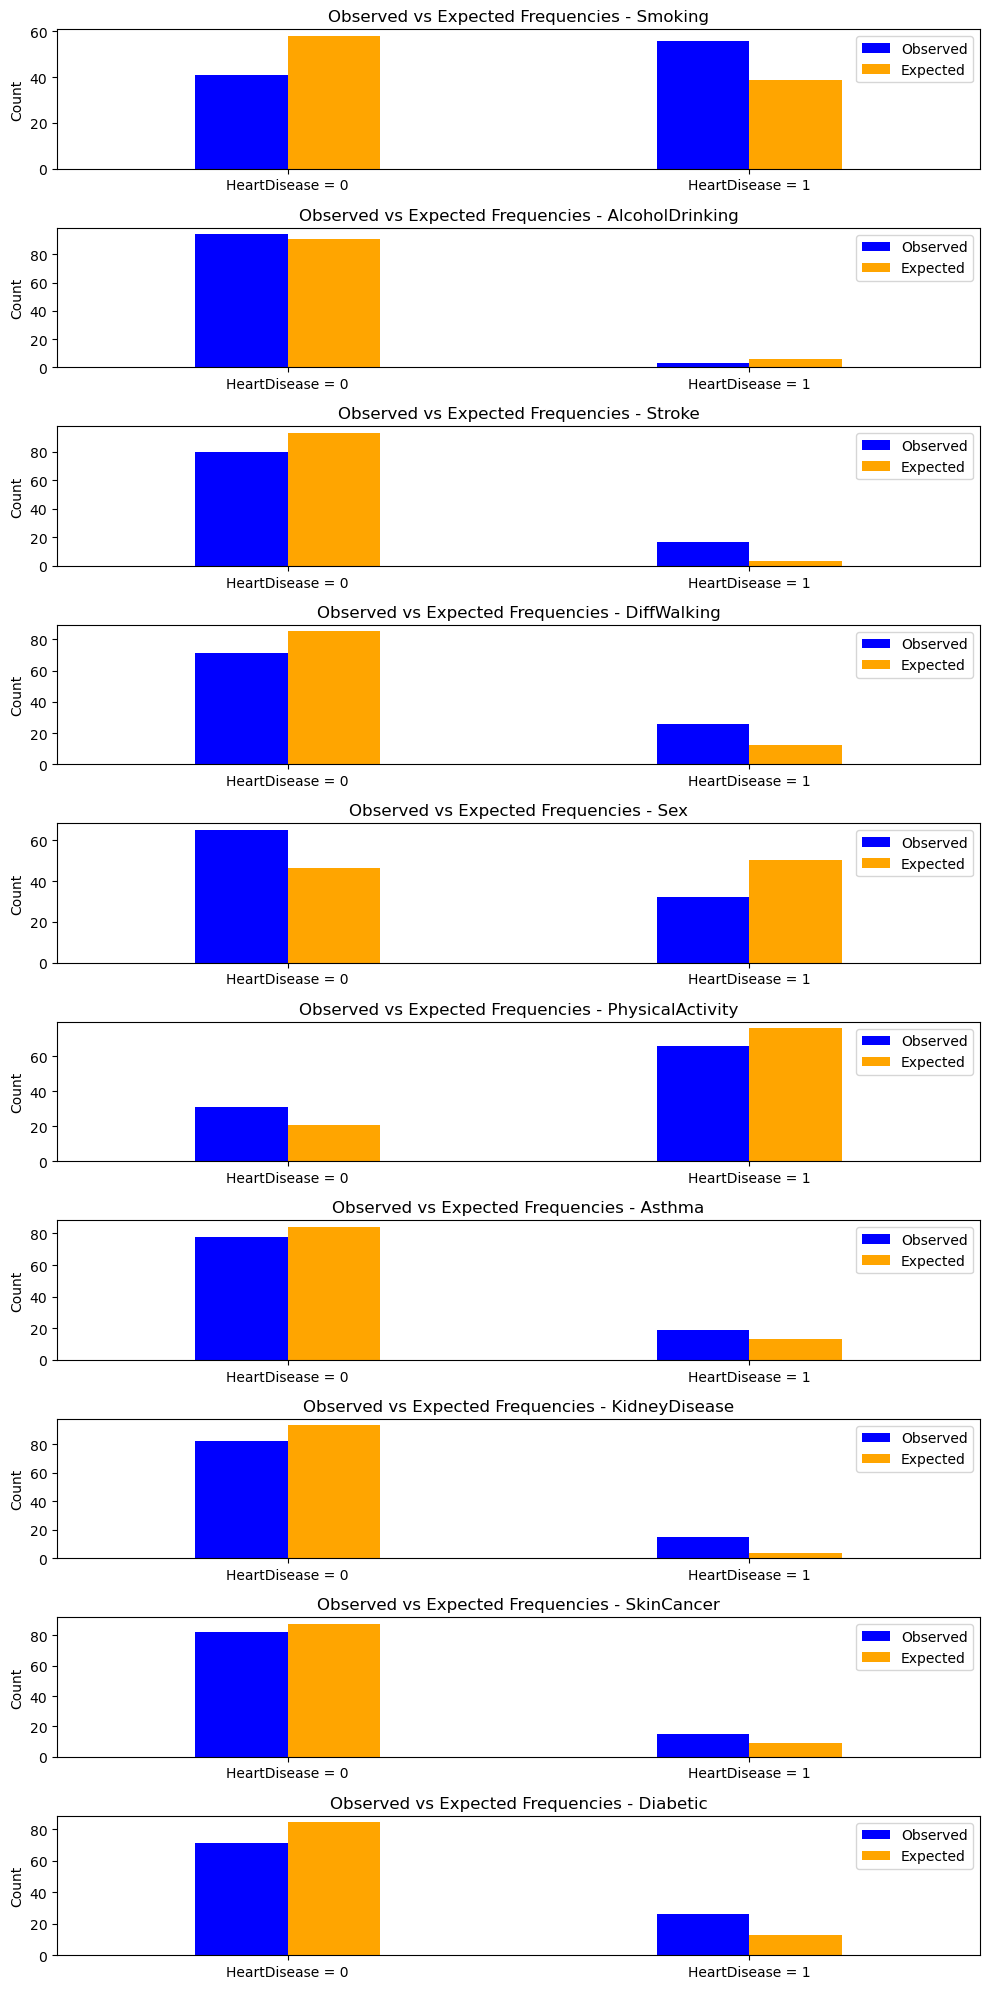

<Figure size 640x480 with 0 Axes>

In [23]:
variables = []

observed_frequencies = []
expected_frequencies = []

for var in binary_variables:
    # Creating a contingency table between the variable and HeartDisease
    contingency_table = pd.crosstab(sample_df[var], sample_df['HeartDisease'])
    
    # Calculating the observed frequencies
    observed = contingency_table.values
    
    # Calculating the expected frequencies
    expected = stats.chi2_contingency(contingency_table)[3]
    
    # Appending the variable name to the list
    variables.append(var)
    
    # Appending the observed and expected frequencies to the respective lists
    observed_frequencies.append(observed)
    expected_frequencies.append(expected)

# Plotting the bar chart
fig, axes = plt.subplots(len(binary_variables), 1, figsize=(10, 20))

for i, var in enumerate(variables):
    # Getting the observed and expected frequencies for the current variable
    observed = observed_frequencies[i]
    expected = expected_frequencies[i]
    
    # Getting the number of categories for the current variable
    num_categories = observed.shape[0]
    
    
    x = np.arange(num_categories)
    
    
    width = 0.2
    axes[i].set_xlim(-0.5, 1.5)  # Set the x-axis limits
    
    # Plotting the observed frequencies
    axes[i].bar(x - width/2, observed[:, 1], width, label='Observed', color='blue')
    
    # Plotting the expected frequencies
    axes[i].bar(x + width/2, expected[:, 1], width, label='Expected', color='orange')
    
    
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(["HeartDisease = 0", "HeartDisease = 1"])
    
    
    axes[i].set_ylabel('Count')
    
    # Set the title of the plot
    axes[i].set_title(f'Observed vs Expected Frequencies - {var}')
    
    
    axes[i].legend()


plt.tight_layout()


plt.show()

plt.savefig('visualizations/observed_vs_expected_frequencies.png')


#### Summary:
- We have taken a sample of size 1000 to perform Chi Square test of independence
- Variables which are not independent of `HeartDisease` are: (`Smoking`, `Stroke`, `DiffWalking`, `KidneyDisease`, `SkinCancer`, `Diabetic`)
- Variables which are independent of `HeartDisease` are: (`AlcoholDrinking`, `Sex`, `PhysicalActivity`, `Asthma`)
- We have also plotted the bar charts comparing the expected and observed frequencies. 
- A keen observation is that for the variables which are independent of `HeartDisease`, we can see that the expected and observed frequencies are very close. 
- However, when the variables are dependent, there is a clear variation in observed and expected frequencies.

### 2.2 Distribution of each ordinal variable and the target variable
#### Objectives:
- Use Kruskal Wallis to check whether the categories of each ordinal variables are of the same distribution

##### $H_{0}$: There is no significant difference in the distribution of ordinal variables across individuals with and without heart disease
##### $H_{1}$: There is a significant difference in the distribution of ordinal variables across individuals with and without heart disease

In [24]:
# Create an empty list to store the results
kruskal_results = []

# Loop through each variable in multi_categories
for var in multi_categories:
    # Perform the Kruskal-Wallis test
    stat, p_value = kruskal(sample_df[var][sample_df['HeartDisease'] == 0], sample_df[var][sample_df['HeartDisease'] == 1])
    
    # Store the results in a dictionary
    result = {
        'Variable': var,
        'Kruskal-Wallis Statistic': stat,
        'p-value': p_value
    }
    
    # Append the result to the results list
    kruskal_results.append(result)

# Convert the results list to a pandas DataFrame
results_df = pd.DataFrame(kruskal_results)

# Display the results
results_df


,Variable,Kruskal-Wallis Statistic,p-value
0,Race,0.117373,7.319015e-01
1,AgeCategory,56.878754,4.635267e-14
2,GenHealth,44.195209,2.972078e-11


In [25]:
# Loop through each row in the results dataframe
for index, row in results_df.iterrows():
    # Get the variable name and p-value
    variable = row['Variable']
    p_value = row['p-value']
    
    if p_value < 0.05:
        print(f"There is evidence to reject the null hypothesis for {variable}.")
        print(f"The variable {variable} is dependent on HeartDisease\n")
    else:
        print(f"There is not enough evidence to reject the null hypothesis for {variable}.")
        print(f"The variable {variable} is independent of HeartDisease\n")

There is not enough evidence to reject the null hypothesis for Race.
The variable Race is independent of HeartDisease

There is evidence to reject the null hypothesis for AgeCategory.
The variable AgeCategory is dependent on HeartDisease

There is evidence to reject the null hypothesis for GenHealth.
The variable GenHealth is dependent on HeartDisease



#### Summary:
- Upon performing Kruskal-Wallis test, we can see that all the distributions of variables, `Race`, `AgeCategory`, `GenHealth` 

### 2.3 Distribution of each continuous variable and the target variable
#### Objectives:
- Use Mann Whitney U test to check whether the distributions of each continuous variables differ with occurrences of heart disease

##### $H_{0}$: There is no significant difference in the distribution of continuous variables between individuals with and without heart disease
##### $H_{1}$: There is a significant difference in the distribution of continuous variables between individuals with and without heart disease

In [26]:
mann_whitney_results = []

# Perform the Mann Whitney U test for each continuous variable
for var in continuous_variables:
    stat, p_value = mannwhitneyu(sample_df[var][sample_df['HeartDisease'] == 0], sample_df[var][sample_df['HeartDisease'] == 1])
    # Store the results in a dictionary
    result = {
        'Variable': var,
        'Kruskal-Wallis Statistic': stat,
        'p-value': p_value
    }
    
    # Append the result to the results list
    mann_whitney_results.append(result)

        
    if p_value < 0.05:
        print(f"There is evidence to reject the null hypothesis for {var}.")
        print(f"The variable {var} is dependent on HeartDisease\n")
    else:
        print(f"There is not enough evidence to reject the null hypothesis for {var}.")
        print(f"The variable {var} is independent of HeartDisease\n")
        
results_df = pd.DataFrame(mann_whitney_results)
results_df


There is not enough evidence to reject the null hypothesis for BMI.
The variable BMI is independent of HeartDisease

There is not enough evidence to reject the null hypothesis for SleepTime.
The variable SleepTime is independent of HeartDisease



,Variable,Kruskal-Wallis Statistic,p-value
0,BMI,39949.5,0.154834
1,SleepTime,45764.0,0.451223


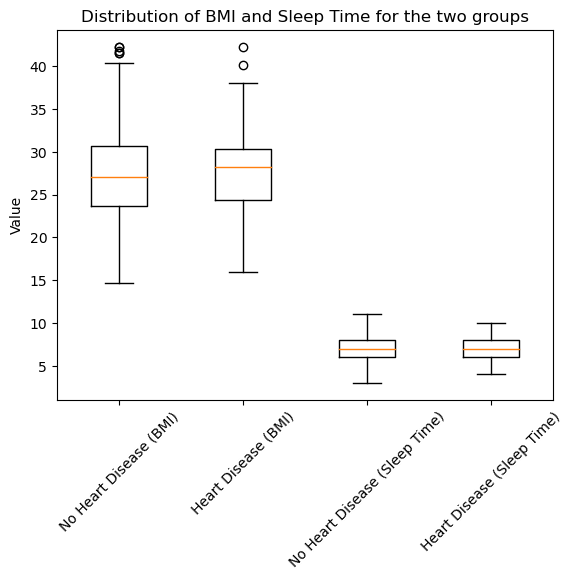

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a box plot for the two groups
plt.boxplot([sample_df['BMI'][sample_df['HeartDisease'] == 0], sample_df['BMI'][sample_df['HeartDisease'] == 1], 
             sample_df['SleepTime'][sample_df['HeartDisease'] == 0], sample_df['SleepTime'][sample_df['HeartDisease'] == 1]])

# Add labels and title
plt.xticks([1, 2, 3, 4], ['No Heart Disease (BMI)', 'Heart Disease (BMI)', 'No Heart Disease (Sleep Time)', 'Heart Disease (Sleep Time)'], rotation=45)
plt.ylabel('Value')
plt.title('Distribution of BMI and Sleep Time for the two groups')

# Show the plot
plt.show()
plt.savefig('visualizations/mann_whitney_test.png')

#### Summary:
- The distributions of `BMI` and  `SleepTime` do not vary with the occurrences of `HeartDisease`
- As observed in the box plots, the distribution is almost the same with and without the occurrences of `HeartDisease`

## 3. Regression Analysis
### 3.1 Logistic Regression of each variable and `HeartDisease` 
#### Objectives:
- Develop a Regression model with each variable and see their significance

In [28]:
# Create a pandas DataFrame to store the coefficients and pseudo r-squared
results_list = []

# Loop through each binary variable
for var in binary_variables:
    # Add a constant column to the data
    X = sm.add_constant(sample_df[var])
    
    # Fit the logistic regression model
    model = sm.Logit(sample_df['HeartDisease'], X)
    result = model.fit()
    
    # Store the results in a dictionary
    result_dict = {
        'Variable': var,
        'Coefficient': result.params[1],
        'Pseudo R-squared': result.prsquared
    }
    
    # Append the result to the results list
    results_list.append(result_dict)

# Convert the results list to a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
results_df


Optimization terminated successfully.
         Current function value: 0.311728
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310120
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.310478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315315
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.316776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.306205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.316652
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311123
  

,Variable,Coefficient,Pseudo R-squared
0,Smoking,0.787906,0.021080
1,AlcoholDrinking,-0.802060,0.003512
2,Stroke,2.188856,0.052681
3,DiffWalking,1.101291,0.026130
4,Sex,-0.875148,0.025006
5,PhysicalActivity,-0.600446,0.009816
6,Asthma,0.522298,0.005227
7,KidneyDisease,1.902062,0.038423
8,SkinCancer,0.605135,0.005617
9,Diabetic,1.023565,0.022981


In [29]:
# Add a constant column to the data
X = sm.add_constant(sample_df[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex']])

# Fit the logistic regression model
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit()

# Print the summary of the regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.281320
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1166
Time:                        14:51:14   Log-Likelihood:                -281.32
converged:                       True   LL-Null:                       -318.44
Covariance Type:            nonrobust   LLR p-value:                 1.339e-14
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3889      0.192    -12.462      0.000      -2.765      -2.013
Smoking       

In [30]:
# Add a constant column to the data
X = sm.add_constant(sample_df[binary_variables])

# Fit the logistic regression model
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit()

# Print the summary of the regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.268917
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1555
Time:                        14:51:14   Log-Likelihood:                -268.92
converged:                       True   LL-Null:                       -318.44
Covariance Type:            nonrobust   LLR p-value:                 8.453e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.6529      0.319     -8.316      0.000      -3.278      -2.028
Smoking    

In [31]:
# Create dummy variables for the 'Race' variable
dummy_race = pd.get_dummies(sample_df['Race'])

dummy_race_selected = dummy_race.iloc[:, [0, 1, 2, 3, 4]]

# Convert the dummy_race dataframe to a numpy array
dummy_race_array = np.asarray(dummy_race, dtype='float64')

# Add a constant column to the data
X = sm.add_constant(dummy_race_array)

# Fit the logistic regression model
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit()

# Print the summary of the model
print(result.summary())

         Current function value: 0.315191
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                 0.01021
Time:                        14:51:15   Log-Likelihood:                -315.19
converged:                      False   LL-Null:                       -318.44
Covariance Type:            nonrobust   LLR p-value:                    0.3696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4561    3.9e+06  -2.17e-06      1.000   -7.64e+06    7.64e+06
x1             6.2501    3.9e+06    1.6e-06      1.000   -7.64e+0

In [33]:
# Create dummy variables for the 'Race' variable
dummy_age = pd.get_dummies(sample_df['AgeCategory'])

# Convert the dummy_age dataframe to a numpy array
dummy_age_array = np.asarray(dummy_age, dtype='float64')

# Add a constant column to the data
X = sm.add_constant(dummy_age_array)

# Fit the logistic regression model with regularization
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit_regularized()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27940444435912687
            Iterations: 105
            Function evaluations: 106
            Gradient evaluations: 105
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1226
Time:                        14:51:34   Log-Likelihood:                -279.40
converged:                       True   LL-Null:                       -318.44
Covariance Type:            nonrobust   LLR p-value:                 2.538e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [34]:
dummy_gen = pd.get_dummies(sample_df['GenHealth'])



# Convert the dummy_race dataframe to a numpy array
dummy_gen_array = np.asarray(dummy_gen, dtype='float64')

# Add a constant column to the data
X = sm.add_constant(dummy_gen_array)

# Fit the logistic regression model
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit()

# Print the summary of the model

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.293614
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                 0.07796
Time:                        14:51:38   Log-Likelihood:                -293.61
converged:                       True   LL-Null:                       -318.44
Covariance Type:            nonrobust   LLR p-value:                 4.265e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7517   7.08e+06  -2.47e-07      1.000   -1.39e+07    1.39e+07
x1             1.0585   7.08e

In [ ]:
# Add a constant column to the data
X = sm.add_constant(sample_df['SleepTime'])

# Fit the logistic regression model
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.288373
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:               0.0002032
Time:                        14:34:42   Log-Likelihood:                -288.37
converged:                       True   LL-Null:                       -288.43
Covariance Type:            nonrobust   LLR p-value:                    0.7320
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2058      0.551     -4.005      0.000      -3.285      -1.126
SleepTime     -0.0260      0.

In [35]:
# Add a constant column to the data
X = sm.add_constant(sample_df['BMI'])

# Fit the logistic regression model
model = sm.Logit(sample_df['HeartDisease'], X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.317938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                0.001579
Time:                        14:51:41   Log-Likelihood:                -317.94
converged:                       True   LL-Null:                       -318.44
Covariance Type:            nonrobust   LLR p-value:                    0.3159
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8033      0.582     -4.813      0.000      -3.945      -1.662
BMI            0.0207      0.